## Tensorflow/OpenCV/Keras | Object Detection

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

### Foundation

(2, 2, 3)


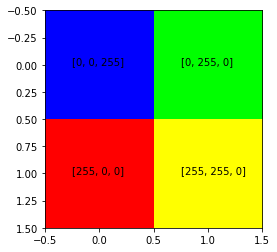

In [5]:
# Representing an image in a plot
colors = [
    [
        [0, 0, 255], # blue
        [0, 255, 0]  # green
    ],
    [
        [255, 0, 0],  # red
        [255, 255, 0] # yellow
    ]
]

print(np.array(colors).shape)

plt.imshow(colors)
start_row = 0
for row in colors:
    start_col = -0.25
    for color in row:
        plt.text(start_col, start_row, str(color))
        start_col += 1
    start_row += 1

(10, 10, 3)


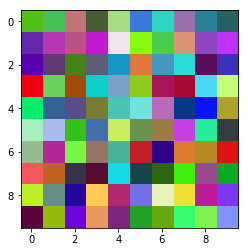

In [8]:
# Playing with image sizes

# SIZE = 2
SIZE = 10
# SIZE = 100

colors = np.array(
    np.array([
        np.array([np.random.randint(0, 255, 3) for x in range(SIZE)]) for x in range(SIZE)
    ])
)

print(np.array(colors).shape)

plt.imshow(colors)

### Basic OpenCV Commands

In [19]:
import os
os.getcwd()

'/Users/Matteo/Github/python-ds/4-tensorflow-object-detection'

In [52]:
# read image (type = numpy.ndarray)
image = cv2.imread("/Users/Matteo/Github/python-ds/4-tensorflow-object-detection/ref/ml-workshop-image-recognition-master/data/chewbacca.jpg")

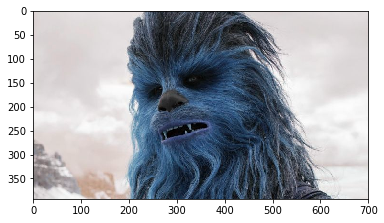

In [53]:
# BGR
plt.imshow(image)

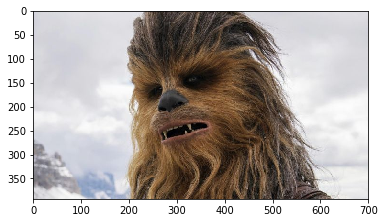

In [28]:
# RGB
# parse BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# show image
plt.imshow(image)

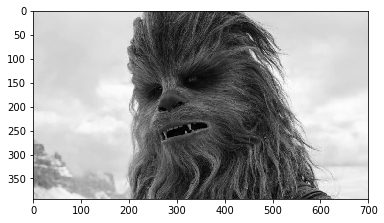

In [29]:
# Grayscale
# parse image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# show image
plt.imshow(gray, cmap='gray')

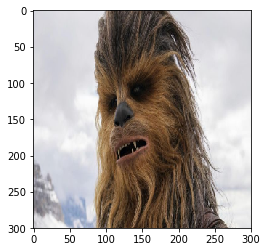

In [31]:
# Resizing image

WIDTH = 300
HEIGHT = 300

# resize, ignoring aspect ratio
resized = cv2.resize(image, (WIDTH, HEIGHT))

# show image
plt.imshow(resized)

1.7811704834605597


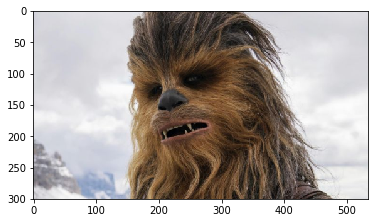

In [32]:
# Rescaling image
aspect = image.shape[1] / float(image.shape[0])
print(aspect)

if(aspect > 1):
    # landscape orientation - wide image
    res = int(aspect * HEIGHT)
    scaled = cv2.resize(image, (res, HEIGHT))
if(aspect < 1):
    # portrait orientation - tall image
    res = int(WIDTH / aspect)
    scaled = cv2.resize(image, (WIDTH, res))
if(aspect == 1):
    scaled = cv2.resize(image, (WIDTH, HEIGHT))

# show image
plt.imshow(scaled)

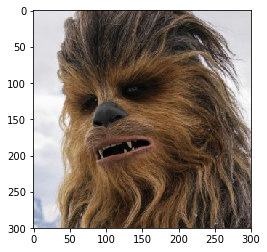

In [33]:
# Cropping image
def crop_center(img, cropx, cropy):
    y,x,c = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy, startx:startx+cropx]
    # yes, the function above should match resize and take a tuple...

# Scaled image
cropped = crop_center(scaled, WIDTH, WIDTH)

# show image
plt.imshow(cropped, cmap='gray')

### KMeans for Pixel Clustering (Image Analysis)

In [44]:
from sklearn.cluster import KMeans
from collections import Counter
from matplotlib import pyplot as plt
import cv2

In [47]:
# Utility function, rgb to hex
def rgb2hex(rgb):
    hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex
print(rgb2hex([255, 0, 0]))

#ff0000


In [48]:
def plot_image_info(path, k=6):
    # load image
    img_bgr = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # resize image to speed up processing time
    resized_img_rgb = cv2.resize(img_rgb, (64, 64), interpolation=cv2.INTER_AREA)

    # reshape the image to be a list of pixels
    img_list = resized_img_rgb.reshape((resized_img_rgb.shape[0] * resized_img_rgb.shape[1], 3))

    # cluster the pixels and assign labels
    clt = KMeans(n_clusters=k)
    labels = clt.fit_predict(img_list)
        
    # count labels to find most popular
    label_counts = Counter(labels)
    total_count = sum(label_counts.values())

    # subset out most popular centroid
    center_colors = list(clt.cluster_centers_)
    ordered_colors = [center_colors[i]/255 for i in label_counts.keys()]
    color_labels = [rgb2hex(ordered_colors[i]*255) for i in label_counts.keys()]
    
    #print(label_counts.values())
    #print(color_labels)
    
    # plots
    plt.figure(figsize=(14, 8))
    plt.subplot(221)
    plt.imshow(img_rgb)
    plt.axis('off')
    
    plt.subplot(222)
    plt.pie(label_counts.values(), labels=color_labels, colors=ordered_colors, startangle=90)
    plt.axis('equal')
    plt.show()

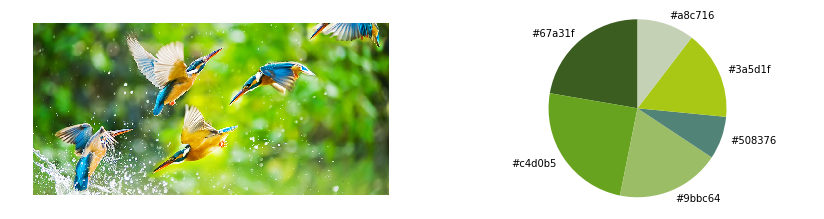

In [54]:
plot_image_info('/Users/Matteo/Github/python-ds/4-tensorflow-object-detection/ref/ml-workshop-image-recognition-master/data/1.jpg')


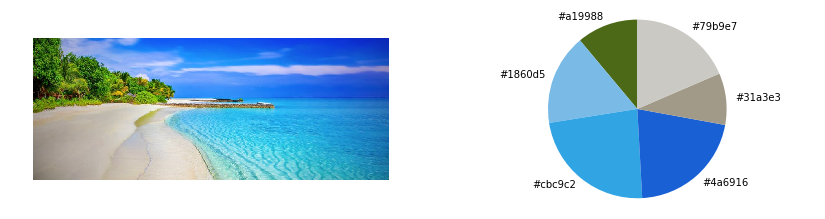

In [55]:
plot_image_info('/Users/Matteo/Github/python-ds/4-tensorflow-object-detection/ref/ml-workshop-image-recognition-master/data/2.jpg')

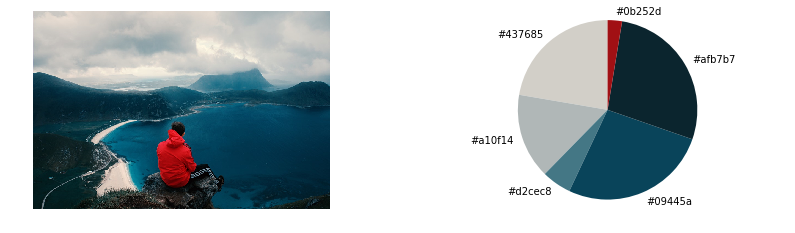

In [56]:
plot_image_info('/Users/Matteo/Github/python-ds/4-tensorflow-object-detection/ref/ml-workshop-image-recognition-master/data/3.jpg')

### Object Recognizer | Deep Network

In [2]:
from keras.applications import inception_v3

Using TensorFlow backend.


In [3]:
# Import pre-trained model (trained on everyday objects)
model = inception_v3.InceptionV3(weights='imagenet')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

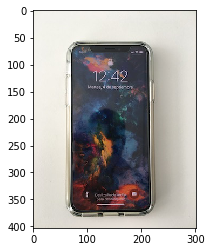

In [4]:
# Testing model on phone image

from PIL import Image

BASE_PATH = '/Users/Matteo/Github/python-ds/4-tensorflow-object-detection/ref/ml-workshop-image-recognition-master/data/' 

image = Image.open(BASE_PATH + 'phone.jpg')
plt.imshow(image)

In [5]:
# Predict

from keras import preprocessing

img = preprocessing.image.load_img(BASE_PATH + 'phone.jpg', target_size=(299, 299))
x = preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = inception_v3.preprocess_input(x)
predictions = model.predict(x)
labels = inception_v3.decode_predictions(predictions, top=3)[0]

labels

[('n02992529', 'cellular_telephone', 0.7631687),
 ('n03584254', 'iPod', 0.12571256),
 ('n03908618', 'pencil_box', 0.015993062)]

In [6]:
import time 

# get the reference to the webcam
camera = cv2.VideoCapture(0)
camera_height = 500

while(True):
    # read a new frame
    _, frame = camera.read()
    
    # flip the frameq
    frame = cv2.flip(frame, 1)

    # rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, camera_height))

    # add rectangle
    cv2.rectangle(frame, (300, 75), (650, 425), (240, 100, 0), 2)

    # get ROI
    roi = frame[75+2:425-2, 300+2:650-2]
    
    # parse BRG to RGB
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

    # resize to 224*224
    roi = cv2.resize(roi, (399, 399))
    roi = inception_v3.preprocess_input(roi)

    # predict!
    roi2 = np.array([cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)])

    predictions = model.predict(roi2)

    labels = inception_v3.decode_predictions(predictions, top=3)[0]

    # add text
    label_1 = '{} - {}%'.format(labels[0][1], int(labels[0][2]*100))
    cv2.putText(frame, label_1, (70, 170), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (20, 240, 150), 2)

    # add text
    label_2 = '{} - {}%'.format(labels[1][1], int(labels[1][2]*100))
    cv2.putText(frame, label_2, (70, 200), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (20, 240, 240), 2)

    # add text
    label_3 = '{} - {}%'.format(labels[2][1], int(labels[2][2]*100))
    cv2.putText(frame, label_3, (70, 230), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (20, 20, 240), 2)

    # show the frame
    cv2.imshow("Real Time object detection", frame)

    key = cv2.waitKey(1)

    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()